In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct
import enel441_utilities as eu

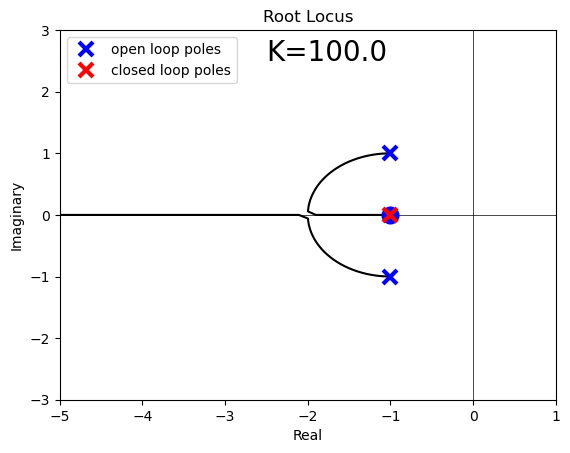

In [4]:


#poles = np.array([-2, -1, 0])
#zeros = []

poles = np.array([-1+1j, -1-1j])
zeros = np.array([-1])

den = eu.roots_to_polynomial(poles)
num = eu.roots_to_polynomial(zeros)

P = ct.tf(num,den)
N = 1000
K_vec = np.logspace(-1,2,N)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Root Locus', artist='Matplotlib',
                comment='visualize closed loop poles moving')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1)
with writer.saving(fig, "root_locus_video_2poles_1zero.mp4", 100):
    for ii in range(1,N):

        cl_poles, K = ct.root_locus(P, plot=False, kvect=K_vec[0:ii])
        ax.clear()
        ax.plot([-5,1],[0,0],'k',linewidth=0.5, label='_nolegend_')
        ax.plot([0,0],[-3,3],'k',linewidth=0.5, label='_nolegend_')
        ax.plot(np.real(cl_poles), np.imag(cl_poles), 'k', label='_nolegend_')
        ax.plot(np.real(poles),np.imag(poles), 'bx', markersize=10, markeredgewidth=3, label='open loop poles' )
        ax.plot(np.real(zeros),np.imag(zeros), 'bo', markersize=10, markeredgewidth=3, label='_nolegend_' )
        ax.plot(np.real(cl_poles[-1]),np.imag(cl_poles[-1]),'rx', markersize=10, markeredgewidth=3, label='closed loop poles')
        ax.set_xlim(-5,1)
        ax.set_ylim(-3,3)
        ax.set_title('Root Locus')
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ann_str = 'K='+ str(np.round(K_vec[ii],2))
        ax.annotate(ann_str,(-2.5,2.5),fontsize=20)
        ax.legend()
        writer.grab_frame()
       

In [17]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video_2poles_1zero.mp4" type="video/mp4">
</video></div>""")

In [ ]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video_3poles.mp4" type="video/mp4">
</video></div>""")

In [11]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video_non_min_phase_zeros.mp4" type="video/mp4">
</video></div>""")

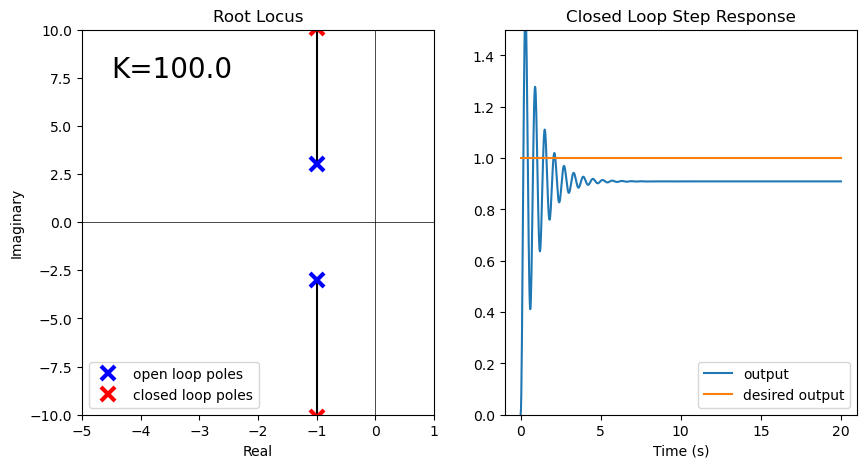

In [4]:


#poles = np.array([-2, -1, 0])
#zeros = []

#poles = np.array([-1+1j, -1-1j])
#zeros = np.array([-1])

#den = eu.roots_to_polynomial(poles)
#num = 0.5*eu.roots_to_polynomial(zeros)

#P = ct.tf(num,den)
den = [1, 2, 10]
P = ct.tf(1, den) 
poles = np.roots(den)
zeros = []
N = 100
K_vec = np.logspace(-1,2,N)
t = np.linspace(0,20,1000)
r = np.ones(1000)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Root Locus', artist='Matplotlib',
                comment='visualize closed loop poles moving')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1,2,figsize=(10,5))
with writer.saving(fig, "root_locus_video_with_step.mp4", 100):
    for ii in range(1,N):

        cl_poles, K = ct.root_locus(P, plot=False, kvect=K_vec[0:ii])
        ax[0].clear()
        ax[0].plot([-5,1],[0,0],'k',linewidth=0.5, label='_nolegend_')
        ax[0].plot([0,0],[-10,10],'k',linewidth=0.5, label='_nolegend_')
        ax[0].plot(np.real(cl_poles), np.imag(cl_poles), 'k', label='_nolegend_')
        ax[0].plot(np.real(poles),np.imag(poles), 'bx', markersize=10, markeredgewidth=3, label='open loop poles' )
        ax[0].plot(np.real(zeros),np.imag(zeros), 'bo', markersize=10, markeredgewidth=3, label='_nolegend_' )
        ax[0].plot(np.real(cl_poles[-1]),np.imag(cl_poles[-1]),'rx', markersize=10, markeredgewidth=3, label='closed loop poles')
        ax[0].set_xlim(-5,1)
        ax[0].set_ylim(-10,10)
        ax[0].set_title('Root Locus')
        ax[0].set_xlabel('Real')
        ax[0].set_ylabel('Imaginary')
        ann_str = 'K='+ str(np.round(K_vec[ii],2))
        ax[0].annotate(ann_str,(-4.5,7.5),fontsize=20)
        ax[0].legend(loc='lower left')

        T = K_vec[ii]*P/(1+K_vec[ii]*P)
        t,y = ct.step_response(T,T=t)
        ax[1].clear()
        ax[1].plot(t,y,label='output')
        ax[1].plot(t,r,label='desired output')
        ax[1].set_title('Closed Loop Step Response')
        ax[1].set_xlabel('Time (s)')
        ax[1].set_ylim([0,1.5])
        ax[1].legend(loc='lower right')

        writer.grab_frame()
       

In [19]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video_with_step.mp4" type="video/mp4">
</video></div>""")

In [16]:
np.roots([1, 2, 10])

array([-1.+3.j, -1.-3.j])